In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Feature Extraction

###  Traffic

In [2]:
clean= pd.read_csv("NF_Data.csv")

In [3]:
clean

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_bytes,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,34912,34.160.144.191,00:50:56:ff:cd:57,00:50:56,443,...,160,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN
1,1,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,54466,142.250.201.3,00:50:56:ff:cd:57,00:50:56,80,...,60,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN
2,2,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,46272,35.241.9.150,00:50:56:ff:cd:57,00:50:56,443,...,160,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN
3,3,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,50508,216.58.212.99,00:50:56:ff:cd:57,00:50:56,80,...,60,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN
4,4,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,51832,216.239.38.120,00:50:56:ff:cd:57,00:50:56,443,...,153,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,13270,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,38904,94.97.238.206,00:50:56:ff:cd:57,00:50:56,443,...,14594,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN
13271,13271,0,192.168.126.2,00:50:56:ff:cd:57,00:50:56,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN
13272,13272,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,38904,94.97.238.206,00:50:56:ff:cd:57,00:50:56,443,...,15030,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN
13273,13273,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,38904,94.97.238.206,00:50:56:ff:cd:57,00:50:56,443,...,13046,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN


In [4]:
malicious= pd.read_csv("NF_Data_None_FilteredMalicious.csv")

In [5]:
malicious

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_bytes,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,0,0,192.168.126.1,16:7d:da:ad:d3:65,16:7d:da,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN
1,1,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,46364,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,...,66,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
2,2,0,192.168.126.2,00:50:56:ff:cd:57,00:50:56,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN
3,3,0,fe80::147d:daff:fead:d365,16:7d:da:ad:d3:65,16:7d:da,5353,ff02::fb,33:33:00:00:00:fb,33:33:00,5353,...,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN
4,4,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,46364,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,...,1157,HTTP,Web,0,6,192.168.126.139,NaN,NaN,Go-http-client/1.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16174,16174,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58446,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,...,66,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
16175,16175,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58446,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,...,376,HTTP,Web,0,6,192.168.126.139,NaN,NaN,Go-http-client/1.1,NaN
16176,16176,0,192.168.126.1,16:7d:da:ad:d3:65,16:7d:da,5353,224.0.0.251,01:00:5e:00:00:fb,01:00:5e,5353,...,0,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN
16177,16177,0,192.168.126.142,00:0c:29:1d:15:6c,00:0c:29,58446,192.168.126.139,00:0c:29:38:db:a9,00:0c:29,8888,...,66,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN


In [6]:
clean['label'] = 0
malicious['label'] = 1

### Merging Cleand and Malicious traffics in to a single dataframe

In [7]:
traffic = pd.concat([clean,malicious],ignore_index=True)

### Saving merged dataframe as csv file

In [9]:
traffic.to_csv("Traffic.csv")

In [10]:
traffic.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'application_name', 'application_category_name',
       'application_is_guessed', 'application_confidence',
       'requested_server_name', 'client_fingerprint', 'server_fingerprint',
       'user_agent', 'content_type', 'label'],
      dtype='object')

In [11]:
data = traffic[['protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'application_name', 'application_category_name',
       'application_is_guessed', 'application_confidence',
       'requested_server_name', 'client_fingerprint', 'server_fingerprint',
       'user_agent', 'content_type', 'label']]


data 

,protocol,ip_version,vlan_id,tunnel_id,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label
0,6,4,0,0,62,4,314,62,2,154,...,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN,0
1,6,4,0,0,1,2,114,0,1,54,...,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
2,6,4,0,0,120,4,314,120,2,154,...,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN,0
3,6,4,0,0,1,2,114,0,1,54,...,HTTP,Web,1,1,NaN,NaN,NaN,NaN,NaN,0
4,6,4,0,0,101,4,300,101,2,147,...,TLS,Web,0,6,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449,6,4,0,0,1,2,132,0,1,66,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,1
29450,6,4,0,0,4,4,1249,4,2,873,...,HTTP,Web,0,6,192.168.126.139,NaN,NaN,Go-http-client/1.1,NaN,1
29451,17,4,0,0,0,1,110,0,1,110,...,MDNS,Network,0,6,_rdlink._tcp.local,NaN,NaN,NaN,NaN,1
29452,6,4,0,0,1,2,132,0,1,66,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,1


# Feature Selection

### dropping features with more than 80% null values

In [12]:
data.isna().sum()

protocol                         0
ip_version                       0
vlan_id                          0
tunnel_id                        0
bidirectional_duration_ms        0
bidirectional_packets            0
bidirectional_bytes              0
src2dst_duration_ms              0
src2dst_packets                  0
src2dst_bytes                    0
dst2src_duration_ms              0
dst2src_packets                  0
dst2src_bytes                    0
application_name                 0
application_category_name        0
application_is_guessed           0
application_confidence           0
requested_server_name        19409
client_fingerprint           26801
server_fingerprint           27638
user_agent                   28298
content_type                 29146
label                            0
dtype: int64

In [13]:
limitPer = len(data) * .80
yourdf = data.dropna(thresh=limitPer, axis=1)


In [14]:
yourdf.isna().sum()

protocol                     0
ip_version                   0
vlan_id                      0
tunnel_id                    0
bidirectional_duration_ms    0
bidirectional_packets        0
bidirectional_bytes          0
src2dst_duration_ms          0
src2dst_packets              0
src2dst_bytes                0
dst2src_duration_ms          0
dst2src_packets              0
dst2src_bytes                0
application_name             0
application_category_name    0
application_is_guessed       0
application_confidence       0
label                        0
dtype: int64

In [16]:
null_counts = yourdf.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

# Data Preprocessing

In [17]:
list(yourdf.select_dtypes(['object']).columns)

['application_name', 'application_category_name']

### Replacing null values of Numeric Features with mean and Object features with Mode.

In [18]:
# Loop through each column in the dataframe
for col in yourdf.columns:
    # Check if column contains numeric values
    if np.issubdtype(yourdf[col].dtype, np.number):
        # Replace null values with mean of column
        yourdf[col].fillna(yourdf[col].mean(), inplace=True)
    else:
        # Replace null values with mode of column
        yourdf[col].fillna(yourdf[col].mode()[0], inplace=True)

### encoding Object features as categorical numerical features

In [20]:
for col in yourdf.columns:
    if yourdf[col].dtype == 'object':
        # Factorize the column
        yourdf[col] = pd.factorize(yourdf[col])[0]

In [26]:
X = data.drop("label", axis=1)
y = data["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = random_forest_classifier.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with 100 decision-trees : 75.5839


# Metrics Evaluation

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
kappa = cohen_kappa_score(y_test, y_pred)
print("Accuracy score:", acc *100)
print("Precision score:", prec*100)
print("Recall score:", rec*100)
print("F1 score:", f1*100)
print("AUC-ROC score:", auc_roc*100)
print("Cohen's kappa score:", kappa*100)

Accuracy score: 75.58392178164041
Precision score: 80.43761396196926
Recall score: 74.67956469165658
F1 score: 77.45171808377226
AUC-ROC score: 84.59776369157532
Cohen's kappa score: 50.910317905164334


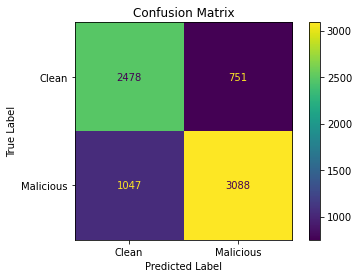

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
custom_labels = ['Clean', 'Malicious']
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)
# plot confusion matrix
disp.plot()
# add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The classifier has 75% percent accuracy on the test set, where out of 7364 cases, 5566 are classified correctly (2478 Clean and 3088 Malicious) and 1798 are classified incorrectly.